In [17]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("kz.csv")

In [19]:
data.describe()

,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [21]:
data.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [22]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [23]:
brand_data = data['brand']
brand_graph_data = {}
for i in brand_data:
    brand_graph_data[i] = 0

In [24]:
for i in brand_data:
    brand_graph_data[i] += 1

In [88]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False
    
def isint(num):
    try:
        int(num)
        return True
    except ValueError:
        return False

In [26]:
final_brand_data = {}
for i in brand_graph_data:
    if(isfloat(i) == False):
        final_brand_data[i] = brand_graph_data[i]

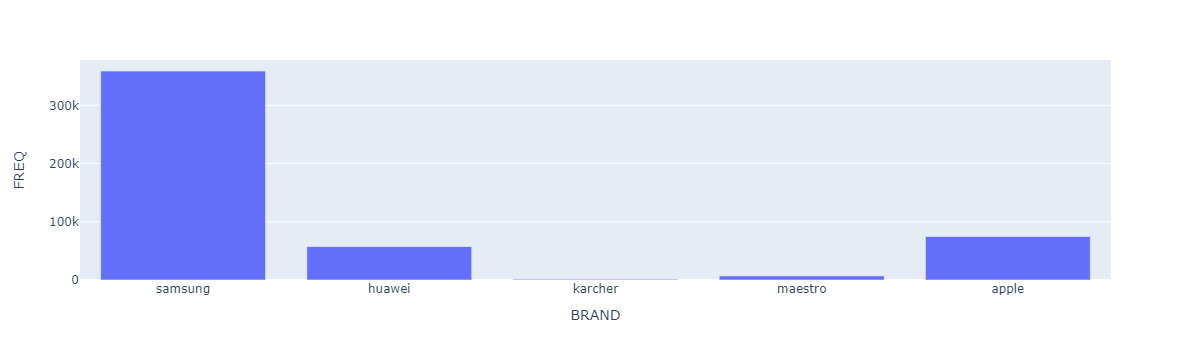

In [27]:
counter = 0


brand_name = list(final_brand_data.keys())
brand_frq = list(final_brand_data.values())

plot_x = []
plot_y = []
while counter < 5:
    plot_x.append(brand_name[counter])
    plot_y.append(brand_frq[counter])
    counter+=1

plot_brand = pd.DataFrame(dict(BRAND = plot_x , FREQ = plot_y))
graph = px.bar(plot_brand,x="BRAND",y="FREQ")
graph

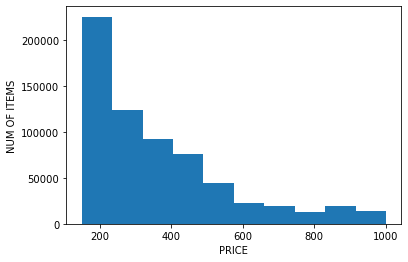

In [32]:
plt.hist(data.price,range=[150,1000])
plt.xlabel("PRICE")
plt.ylabel("NUM OF ITEMS")
plt.show()

DAY OF THE ORDERS

In [43]:
from datetime import datetime
dates = data.event_time
idx = 0
formatted_dates=[]
get_dates={}
for i in dates:
    length = len(i)
    counter = 0
    date= i[0:length-4]
    formatted_dates.append(date)
    # formatted_dates.append(date)



In [ ]:
final_dates = []
for i in formatted_dates:
    date = datetime.strptime(i, '%Y-%m-%d %H:%M:%S')
    today = str(date.year) + "-" + str(date.month) + "-" + str(date.day)
    final_dates.append(today)


In [94]:
for i in final_dates:
    check = str(i)
    if(check.isnumeric() == False):
        get_dates[i] = 0
    
for i in final_dates:
    check = str(i)
    if(check.isnumeric() == False):
        get_dates[i] +=1